# Generalized QSP

`GeneralizedQSP` implements the Quantum Eigenvalue Transform on a unitary $U$ using QSP. Given a complex GQSP polynomial $P$ (and its complement $Q$), it implements the unitary:
$$U' = \begin{bmatrix} P(U) & \cdot \\ Q(U) & \cdot \end{bmatrix}$$

Here, the polynomials $P, Q$ must satisfy the following constraint:

$$\left| P(e^{i\theta}) \right|^2 + \left| Q(e^{i\theta}) \right|^2 = 1 ~~\text{for every}~ \theta \in [0, 2\pi]$$

A polynomial $P$ is said to be a GQSP polynomial iff it satisfies $\left| P(e^{i\theta}) \right|^2 \le 1$ for every $\theta \in [0, 2\pi]$. 

#### References
 - [Generalized Quantum Signal Processing](https://arxiv.org/abs/2308.01501).     Motlagh and Wiebe. (2023). Theorem 3; Figure 2; Theorem 6.


In [1]:
from qualtran.bloqs.qubitization_walk_operator_test import get_walk_operator_for_1d_ising_model
from qualtran.bloqs.qsp.generalized_qsp import GeneralizedQSP
from qualtran.drawing import show_bloq
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

/home/anurudh/sources/python-envs/qualtran/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


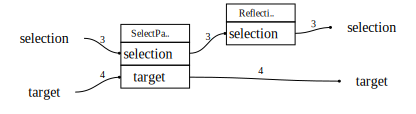

In [2]:
U = get_walk_operator_for_1d_ising_model(4, 2e-1)
show_bloq(U.decompose_bloq())

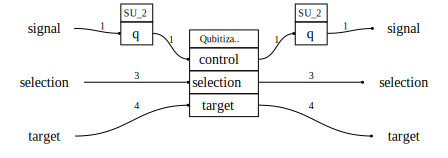

In [3]:
pU = GeneralizedQSP(U, (0.5, 0.5), (-0.5, 0.5))
show_bloq(pU.decompose_bloq())

There is also a method that directly computes $Q$ from $P$:

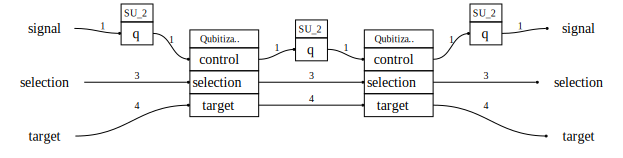

In [4]:
pU = GeneralizedQSP.from_qsp_polynomial(U, (0.5, 0, 0.5))
show_bloq(pU.decompose_bloq())

### Negative degree terms

To apply GQSP for a polynomial $P'(z) = z^{-k} P(z)$, we can just pass the polynomial $P$ along with negative power $k$.
The QSP angle sequence is the same for both, and $P'$ can be achieved by running $(U^\dagger)^k$ at any point in the circuit.

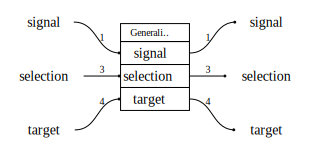

In [5]:
pU = GeneralizedQSP.from_qsp_polynomial(U, (0.5, 0, 0.5), negative_power=1)
show_bloq(pU)

# Generalized QSP

## `GeneralizedQSP`
Applies a QSP polynomial $P$ to a unitary $U$ to obtain a block-encoding of $P(U)$.

Can optionally provide a negative power offset $k$ (defaults to 0),
to obtain $U^{-k} P(U)$. (Theorem 6)
This gate represents the following unitary:

    $$ \begin{bmatrix} U^{-k} P(U) & \cdot \\ Q(U) & \cdot \end{bmatrix} $$

The polynomial $P$ must satisfy:
$\abs{P(e^{i \theta})}^2 \le 1$ for every $\theta \in \mathbb{R}$.

The exact circuit is described in Figure 2.

#### Parameters
 - `U`: Unitary operation.
 - `P`: Co-efficients of a complex polynomial.
 - `negative_power`: value of $k$, which effectively applies $z^{-k} P(z)$. defaults to 0. 

#### References
 - [Generalized Quantum Signal Processing](https://arxiv.org/abs/2308.01501).     Motlagh and Wiebe. (2023). Theorem 3; Figure 2; Theorem 6.


In [7]:
from qualtran.bloqs.qsp.generalized_qsp import GeneralizedQSP

### Example Instances

In [8]:
from qualtran.bloqs.for_testing.random_gate import RandomGate

gqsp = GeneralizedQSP.from_qsp_polynomial(RandomGate.create(1, random_state=42), (0.5, 0.5))

#### Graphical Signature

In [9]:
from qualtran.drawing import show_bloqs
show_bloqs([gqsp],
           ['`gqsp`'])

### Call Graph

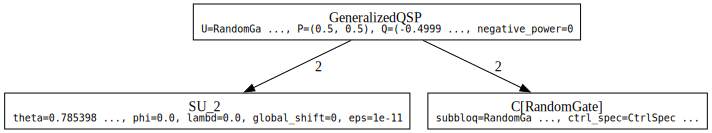

#### Counts totals:
 - `C[RandomGate(bitsize=1, matrix=(((0.2770245903861146-0.13059068747491814j), (-0.7635048843051476+0.5685628727840187j)), ((0.3612251651727512+0.880749583430019j), (0.17008310438356575+0.25469253804737874j))))]`: 2
 - `SU2RotationGate(theta=0.7853981633974483, phi=0.0, lambd=0.0, global_shift=0, eps=1e-11)`: 2

In [10]:
from qualtran.resource_counting.generalizers import ignore_split_join
gqsp_g, gqsp_sigma = gqsp.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gqsp_g)
show_counts_sigma(gqsp_sigma)